<a href="https://colab.research.google.com/github/AJ-Horch/customer_lifetime_value_prediction/blob/main/product_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
events = pd.read_parquet('/content/drive/MyDrive/year 29/Data Science /notebooks/solve_any_data_analysis_problem/project_3/events.parquet.gz')

In [ ]:
events.head()

,event_time,event_type,product_id,category_id,subcategory,brand,price,user_id,user_session,corrected_category,category,corrected_brand,product_name
0,2019-12-01 00:00:02+00:00,purchase,26400248,2053013553056579841,computers.peripherals.printer,None,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db,None,computers,None,26400248 - computers.peripherals.printer
1,2019-12-01 00:00:12+00:00,cart,1004833,2232732093077520756,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,electronics.smartphone,electronics,None,1004833 - samsung electronics.smartphone
2,2019-12-01 00:00:28+00:00,cart,17800342,2053013559868129947,computers.desktop,zeta,66.90,550465671,22650a62-2d9c-4151-9f41-2674ec6d32d5,None,computers,None,17800342 - zeta computers.desktop
3,2019-12-01 00:00:30+00:00,cart,1005003,2232732093077520756,electronics.smartphone,huawei,227.64,555295228,3de3ac21-f446-4cf5-b3c3-06a051c5caa9,electronics.smartphone,electronics,None,1005003 - huawei electronics.smartphone
4,2019-12-01 00:00:39+00:00,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,None,appliances,None,3701309 - polaris appliances.environment.vacuum


In [ ]:
events['event_type'].value_counts()

,count
event_type,
cart,5276372
purchase,1756753


In [ ]:
# create copies of the purchases and carts
purchases = events[events['event_type'] == 'purchase'].copy()
carts = events[events['event_type'] == 'cart'].copy()

In [ ]:
# sanity check
assert len(purchases) + len(carts) == len(events)

### Sanity checks
Are there any gaps

In [ ]:
 (
    events
    .assign(month=events['event_time'].dt.month,
            day=events['event_time'].dt.day)
    .groupby('month')
    ['day']
    .nunique()
 )

,day
month,
11,30
12,31


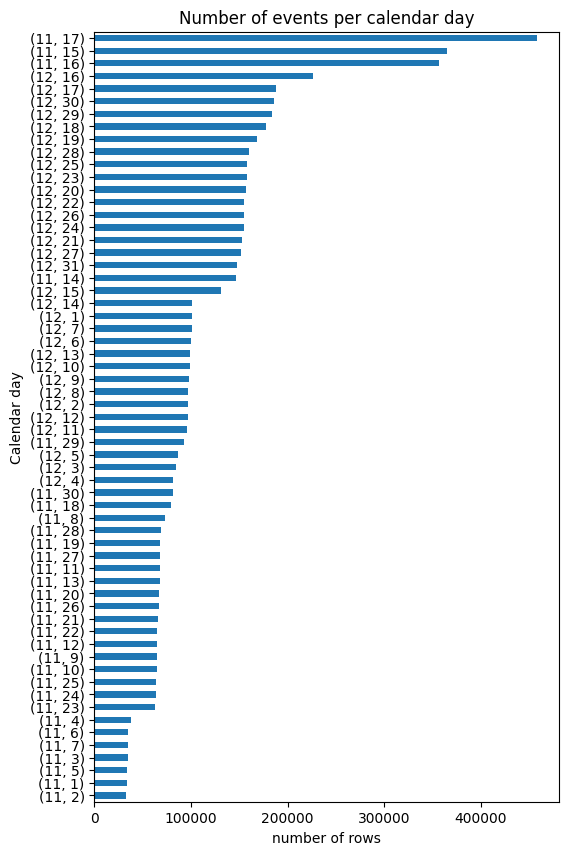

In [ ]:
fig, axis = plt.subplots(figsize=(6,10))

(
    events
    .assign(month=events['event_time'].dt.month,
            day=events['event_time'].dt.day)
    [['month', 'day']]
    .value_counts()
    .sort_values()
    .plot
    .barh(ax=axis)
)

axis.set(title='Number of events per calendar day',
         xlabel="number of rows",
         ylabel='Calendar day')
plt.show()

<Axes: ylabel='month,day'>

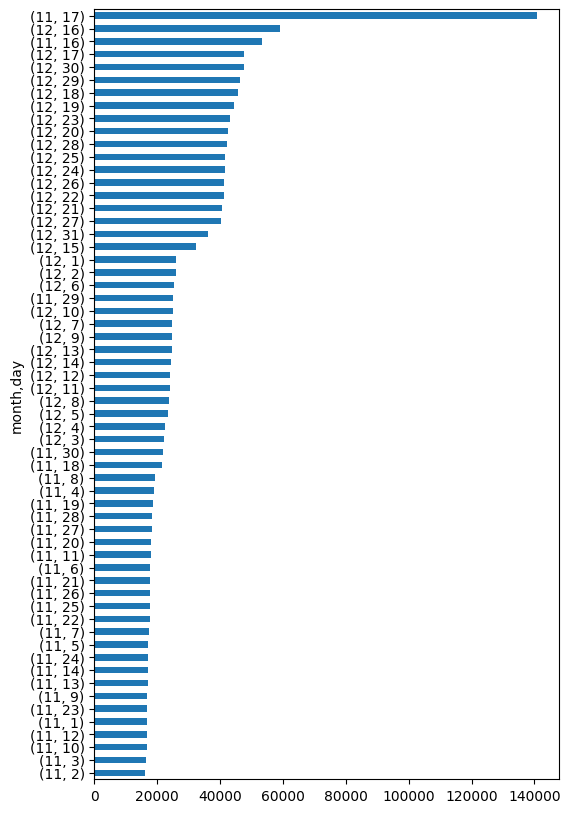

In [ ]:
fig, axis = plt.subplots(figsize=(6,10))

(
    purchases
    .assign(month=events['event_time'].dt.month,
            day=events['event_time'].dt.day)
    [['month', 'day']]
    .value_counts()
    .sort_values()
    .plot
    .barh(ax=axis)
)

What is going on with Nov 17? It wasn't a black firday offically.

### Top product in Dec
- by volume
- by total rev
- by number of unique users purchased


In [ ]:
# Top sells by price
(
    purchases
    .groupby('product_name')
    ['price']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

,price
product_name,
1005115 - apple electronics.smartphone,44543132.03
1005105 - apple electronics.smartphone,24795449.26
1004249 - apple electronics.smartphone,15469146.88
1005135 - apple electronics.smartphone,15235794.52
1002544 - apple electronics.smartphone,14132724.38
1004767 - samsung electronics.smartphone,13707020.74
1005116 - apple electronics.smartphone,12655719.05
1004856 - samsung electronics.smartphone,8511602.79
1002524 - apple electronics.smartphone,6829051.90


In [ ]:
# Top sellers by volume
(
    purchases
    ['product_name']
    .value_counts()
    .head()
)

,count
product_name,
1004856 - samsung electronics.smartphone,66866
1004767 - samsung electronics.smartphone,56869
1005115 - apple electronics.smartphone,48708
4804056 - apple sport.bicycle,40296
1005100 - samsung electronics.smartphone,33589


In [ ]:
# Top sellers by nuber of unique user purchases
(
    purchases
    .groupby('product_name')
    ['user_id']
    .nunique()
    .sort_values(ascending=False)
)

,user_id
product_name,
1004856 - samsung electronics.smartphone,41757
1004767 - samsung electronics.smartphone,36850
1005115 - apple electronics.smartphone,28767
4804056 - apple sport.bicycle,23273
1005100 - samsung electronics.smartphone,21835
...,...
2240054 - canon furniture.bedroom.blanket,1
2240053 - canon furniture.bedroom.blanket,1
2240041 - canon furniture.bedroom.blanket,1


### League table
For metrics I am most concerned with
- by volume sold (monthly)
- by total rev (monthly)
- by number of unique users pirchased (monthly)
- changes for the same point in Nov (this is to see which is the best product during christmas)

These metrics only needs the purchases data, but for conversion we'll need 'cart' events too so we'll join that metric on separately

In [ ]:
purchases_league_table = (
    purchases
    .assign(
        november_count=np.where(purchases["event_time"].dt.month==11, 1, 0),
        november_revenue=np.where(purchases["event_time"].dt.month==11, purchases["price"], 0),
        november_user_id=np.where(purchases["event_time"].dt.month==11, purchases["user_id"], np.nan),
        december_count=np.where(purchases["event_time"].dt.month==12, 1, 0),
        december_revenue=np.where(purchases["event_time"].dt.month==12, purchases["price"], 0),
        december_user_id=np.where(purchases["event_time"].dt.month==12, purchases["user_id"], np.nan))
    .groupby(["product_id", "product_name"])
    .agg(november_volume=('november_count', 'sum'),
         november_revenue=('november_revenue', 'sum'),
         november_users=('november_user_id', 'nunique'),
         december_volume=('december_count', 'sum'),
         december_revenue=('december_revenue', 'sum'),
         december_users=('december_user_id', 'nunique')
    )
    .assign(
        volume_diff=lambda x:
            x["december_volume"] - x["november_volume"],
        revenue_diff=lambda x:
            x["december_revenue"] - x["november_revenue"],
        users_diff=lambda x:
            x["december_users"] - x["november_users"])
    .reset_index()
)

purchases_league_table.head()

,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,users_diff
0,1000978,1000978 - samsung electronics.smartphone,20,6135.32,17,16,4260.40,16,-4,-1874.92,-1
1,1001588,1001588 - meizu electronics.smartphone,6,766.29,5,13,1652.55,12,7,886.26,7
2,1001605,1001605 - apple electronics.smartphone,0,0.00,0,18,9806.76,16,18,9806.76,16
3,1001606,1001606 - apple electronics.smartphone,0,0.00,0,11,5662.69,10,11,5662.69,10
4,1001618,1001618 - apple electronics.smartphone,36,18059.76,25,7,4745.84,7,-29,-13313.92,-18


In [ ]:
# Conversion table
conversion_table = (
    pd.pivot_table(
        data=events.assign(month=events['event_time'].dt.month),
        index=['product_id', 'product_name'],
        columns=['month', 'event_type'],
        values='user_session',
        aggfunc='count'
    )
    .fillna(0)
    .set_axis(labels=['november_cart', 'november_sold', 'december_cart', 'december_sold'],
              axis=1)
    .reset_index()
    .assign(november_conversion=lambda x: x['november_sold'] / x['november_cart'],
            december_conversion=lambda x: x['december_sold'] / x['december_cart'])
)

conversion_table.head()

,product_id,product_name,november_cart,november_sold,december_cart,december_sold,november_conversion,december_conversion
0,1000894,1000894 - texet electronics.smartphone,0.0,0.0,4.0,0.0,NaN,0.000000
1,1000978,1000978 - samsung electronics.smartphone,60.0,20.0,58.0,16.0,0.333333,0.275862
2,1001588,1001588 - meizu electronics.smartphone,16.0,6.0,37.0,13.0,0.375000,0.351351
3,1001605,1001605 - apple electronics.smartphone,0.0,0.0,42.0,18.0,NaN,0.428571
4,1001606,1001606 - apple electronics.smartphone,0.0,0.0,23.0,11.0,NaN,0.478261


In [ ]:
# merge the league and conversion tables
league_table = purchases_league_table.merge(conversion_table, on=['product_id', 'product_name'], how='left')
league_table.head()

,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,users_diff,november_cart,november_sold,december_cart,december_sold,november_conversion,december_conversion
0,1000978,1000978 - samsung electronics.smartphone,20,6135.32,17,16,4260.40,16,-4,-1874.92,-1,60.0,20.0,58.0,16.0,0.333333,0.275862
1,1001588,1001588 - meizu electronics.smartphone,6,766.29,5,13,1652.55,12,7,886.26,7,16.0,6.0,37.0,13.0,0.375000,0.351351
2,1001605,1001605 - apple electronics.smartphone,0,0.00,0,18,9806.76,16,18,9806.76,16,0.0,0.0,42.0,18.0,NaN,0.428571
3,1001606,1001606 - apple electronics.smartphone,0,0.00,0,11,5662.69,10,11,5662.69,10,0.0,0.0,23.0,11.0,NaN,0.478261
4,1001618,1001618 - apple electronics.smartphone,36,18059.76,25,7,4745.84,7,-29,-13313.92,-18,69.0,36.0,17.0,7.0,0.521739,0.411765


In [ ]:
league_table.dtypes

,0
product_id,int64
product_name,object
november_volume,int64
november_revenue,float64
november_users,int64
december_volume,int64
december_revenue,float64
december_users,int64
volume_diff,int64
revenue_diff,float64


In [ ]:
# Check that product ID is still unique
assert len(league_table) == purchases['product_id'].nunique()

## 'Scoring' each product
We have bunch of metrics in place - how will each product be scored?

Depends on what we care about:
- Could pick the one metric to sore the list by and just think of top N products as 'best'
- Could weight each metric by its relative importance to others and create a 'weighted combination' of metric values
- if we care about best Christmas performers we could look at the distribution of one of the 'diff' columns and see the positive outliers

Lots of options: Since the brief was about christmas, lets go with that option.
Which metric do I care most about?
- which product brought the most revenue: No, more expensive items will skew
- Number of unique users that bought the product: maybe
- Volume of sold items seems like a good start
- Conversion can be looked at afterwards

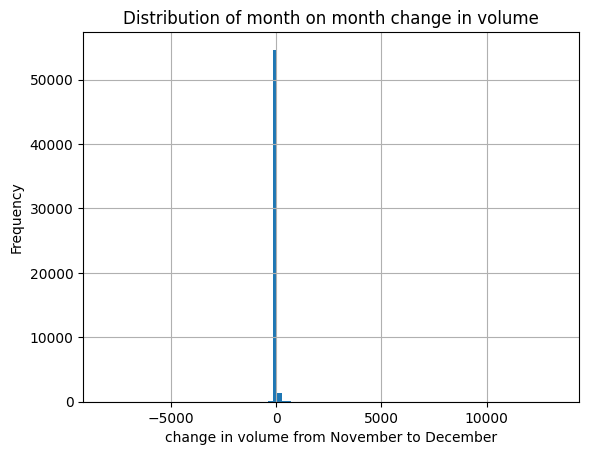

In [ ]:
fig, axis = plt.subplots()

league_table['volume_diff'].hist(bins=100, ax=axis)

axis.set(title='Distribution of month on month change in volume',
         xlabel='change in volume from November to December',
         ylabel='Frequency')
plt.show()

not a lot of change, enhance

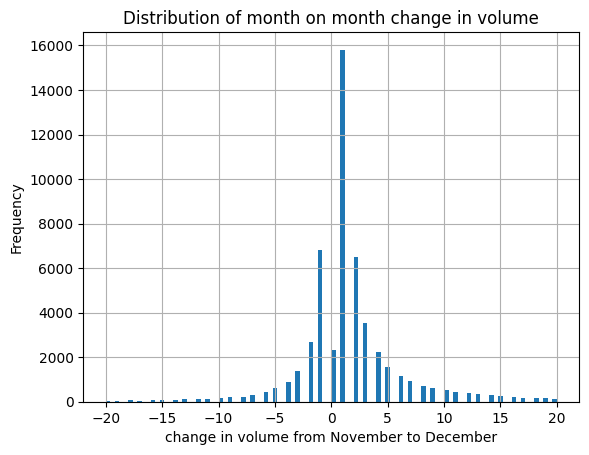

In [ ]:
fig, axis = plt.subplots()

league_table.loc[league_table['volume_diff'].between(-20,20), 'volume_diff'].hist(bins=100, ax=axis)

axis.set(title='Distribution of month on month change in volume',
         xlabel='change in volume from November to December',
         ylabel='Frequency')
plt.show()

Look ath percentage change so large-volume items don't skew


In [ ]:
league_table['volume_diff_pct'] = (
    100 * (league_table['volume_diff']/league_table['november_volume'])
)

(
    league_table
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
    .sort_values('volume_diff_pct', ascending=False).head()
)

,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,users_diff,november_cart,november_sold,december_cart,december_sold,november_conversion,december_conversion,volume_diff_pct
55,1002995,1002995 - apple electronics.smartphone,3,849.36,3,422,154804.17,318,419,153954.81,315,4.0,3.0,798.0,422.0,0.750000,0.528822,13966.666667
5523,3100883,3100883 - scarlett appliances.kitchen.blender,1,20.57,1,93,1444.36,86,92,1423.79,85,6.0,1.0,396.0,93.0,0.166667,0.234848,9200.000000
52266,100023495,100023495 - lenovo electronics.smartphone,1,617.52,1,71,40284.93,48,70,39667.41,47,7.0,1.0,238.0,71.0,0.142857,0.298319,7000.000000
72,1003141,1003141 - apple appliances.kitchen.refrigerators,1,382.97,1,69,19710.02,60,68,19327.05,59,16.0,1.0,153.0,69.0,0.062500,0.450980,6800.000000
304,1004157,1004157 - samsung electronics.smartphone,1,756.78,1,66,46380.08,60,65,45623.30,59,1.0,1.0,253.0,66.0,1.000000,0.260870,6500.000000


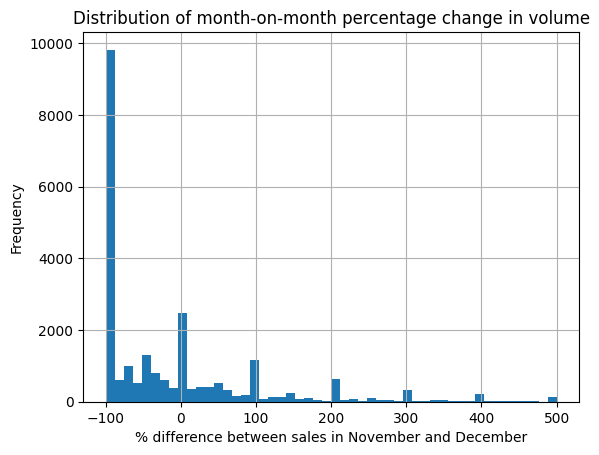

In [ ]:
fig, axis = plt.subplots()

(
    league_table['volume_diff_pct']
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
    .loc[lambda x: x.between(-101, 501)]
    .hist(bins=50, ax=axis)
)

axis.set(
    title="Distribution of month-on-month percentage change in volume",
    xlabel="% difference between sales in November and December",
    ylabel="Frequency"
)

plt.show()

What are the biggest differences (excluding when we didn't sell any in Nov)

In [ ]:
(
    league_table[(league_table["volume_diff_pct"] > 200)
    & (np.isinf(league_table['volume_diff_pct']) == False)]
    .sort_values('volume_diff_pct', ascending=False)
)

,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,users_diff,november_cart,november_sold,december_cart,december_sold,november_conversion,december_conversion,volume_diff_pct
55,1002995,1002995 - apple electronics.smartphone,3,849.36,3,422,154804.17,318,419,153954.81,315,4.0,3.0,798.0,422.0,0.750000,0.528822,13966.666667
5523,3100883,3100883 - scarlett appliances.kitchen.blender,1,20.57,1,93,1444.36,86,92,1423.79,85,6.0,1.0,396.0,93.0,0.166667,0.234848,9200.000000
52266,100023495,100023495 - lenovo electronics.smartphone,1,617.52,1,71,40284.93,48,70,39667.41,47,7.0,1.0,238.0,71.0,0.142857,0.298319,7000.000000
72,1003141,1003141 - apple appliances.kitchen.refrigerators,1,382.97,1,69,19710.02,60,68,19327.05,59,16.0,1.0,153.0,69.0,0.062500,0.450980,6800.000000
304,1004157,1004157 - samsung electronics.smartphone,1,756.78,1,66,46380.08,60,65,45623.30,59,1.0,1.0,253.0,66.0,1.000000,0.260870,6500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1201371,1201371 - prestigio apparel.shoes.slipons,34,2615.96,26,103,7891.70,89,69,5275.74,63,116.0,34.0,287.0,103.0,0.293103,0.358885,202.941176
910,1005211,1005211 - samsung electronics.smartphone,633,112191.79,477,1917,328254.50,1341,1284,216062.71,864,2032.0,633.0,5270.0,1917.0,0.311516,0.363757,202.843602
4040,2501751,2501751 - artel appliances.kitchen.oven,52,2244.02,49,157,6418.16,138,105,4174.14,89,156.0,52.0,460.0,157.0,0.333333,0.341304,201.923077
978,1005288,1005288 - xiaomi electronics.smartphone,163,42611.15,126,491,118715.03,371,328,76103.88,245,767.0,163.0,1717.0,491.0,0.212516,0.285964,201.226994


Now the cases where we sol none in November, but some in December


In [ ]:
(
    league_table[np.isinf(league_table['volume_diff_pct'])]
    .sort_values('december_volume', ascending=False)
)

,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,users_diff,november_cart,november_sold,december_cart,december_sold,november_conversion,december_conversion,volume_diff_pct
10502,5100816,5100816 - xiaomi apparel.shoes,0,0.0,0,9380,284363.18,7111,9380,284363.18,7111,0.0,0.0,34753.0,9380.0,NaN,0.269905,inf
7574,4100346,4100346 - sony apparel.shoes,0,0.0,0,5265,1817117.90,3370,5265,1817117.90,3370,0.0,0.0,14276.0,5265.0,NaN,0.368801,inf
54120,100038678,100038678 - apple electronics.smartphone,0,0.0,0,1549,554026.79,1075,1549,554026.79,1075,0.0,0.0,3939.0,1549.0,NaN,0.393247,inf
24909,16500007,16500007 - omron apparel.costume,0,0.0,0,1301,81656.93,1137,1301,81656.93,1137,0.0,0.0,4150.0,1301.0,NaN,0.313494,inf
36978,26300086,26300086 - lucente appliances.kitchen.coffee_g...,0,0.0,0,1012,226446.36,838,1012,226446.36,838,0.0,0.0,2397.0,1012.0,NaN,0.422194,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33103,22000172,22000172 - construction.tools.light,0,0.0,0,1,205.90,1,1,205.90,1,0.0,0.0,1.0,1.0,NaN,1.000000,inf
33101,22000165,22000165 - construction.tools.light,0,0.0,0,1,141.55,1,1,141.55,1,0.0,0.0,5.0,1.0,NaN,0.200000,inf
33100,22000163,22000163 - construction.tools.light,0,0.0,0,1,154.42,1,1,154.42,1,0.0,0.0,4.0,1.0,NaN,0.250000,inf
33098,22000157,22000157 - construction.tools.light,0,0.0,0,1,118.38,1,1,118.38,1,0.0,0.0,2.0,1.0,NaN,0.500000,inf


We now have:
- Produts that sold much more in Dec than Nov
- Products that sold nothing in November but at least 1 in December

What do these products have in common. Extract them and look at the distribution of product category.

We need some sensible ut-offs:
- Say anything that sold more than double in Decemeber vs November, and at least 10 in Nov, gets counted
- and anything where we sold at least 100 in December but 0 in Nov.

Extract a unique product lookup table to re-join to these metrics
- Don't include the product prive becuase that changes depending on discounts


In [ ]:
events.groupby('product_name')['price'].nunique().loc[lambda x: x>1].sort_values(ascending=False).head(10)

,price
product_name,
1004872 - samsung electronics.smartphone,185
1005169 - samsung electronics.smartphone,176
1004870 - samsung electronics.smartphone,174
1004768 - samsung electronics.smartphone,170
1004766 - samsung electronics.smartphone,164
1004871 - samsung electronics.smartphone,157
1005171 - samsung electronics.smartphone,156
1005211 - samsung electronics.smartphone,156
1005168 - samsung electronics.smartphone,155


This particular Samsung phone has had 185 different price

In [ ]:
events.head()

,event_time,event_type,product_id,category_id,subcategory,brand,price,user_id,user_session,corrected_category,category,corrected_brand,product_name
0,2019-12-01 00:00:02+00:00,purchase,26400248,2053013553056579841,computers.peripherals.printer,None,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db,None,computers,None,26400248 - computers.peripherals.printer
1,2019-12-01 00:00:12+00:00,cart,1004833,2232732093077520756,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,electronics.smartphone,electronics,None,1004833 - samsung electronics.smartphone
2,2019-12-01 00:00:28+00:00,cart,17800342,2053013559868129947,computers.desktop,zeta,66.90,550465671,22650a62-2d9c-4151-9f41-2674ec6d32d5,None,computers,None,17800342 - zeta computers.desktop
3,2019-12-01 00:00:30+00:00,cart,1005003,2232732093077520756,electronics.smartphone,huawei,227.64,555295228,3de3ac21-f446-4cf5-b3c3-06a051c5caa9,electronics.smartphone,electronics,None,1005003 - huawei electronics.smartphone
4,2019-12-01 00:00:39+00:00,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,None,appliances,None,3701309 - polaris appliances.environment.vacuum


Product ID hould be unique in this poduct catalog and sometimes the same product has multiple categoey IDs for a start

In [ ]:
events.groupby(['product_id', 'product_name', 'subcategory', 'brand', 'category'])['category_id'].nunique().loc[lambda x: x > 1]

,,,,,category_id
product_id,product_name,subcategory,brand,category,
1000978,1000978 - samsung electronics.smartphone,electronics.smartphone,samsung,electronics,2
1001588,1001588 - meizu electronics.smartphone,electronics.smartphone,meizu,electronics,2
1001618,1001618 - apple electronics.smartphone,electronics.smartphone,apple,electronics,2
1001619,1001619 - apple electronics.smartphone,electronics.smartphone,apple,electronics,2
1002098,1002098 - samsung electronics.smartphone,electronics.smartphone,samsung,electronics,2
...,...,...,...,...,...
100027045,100027045 - clatronic apparel.shoes.sandals,apparel.shoes.sandals,clatronic,apparel,2
100027452,100027452 - pulser appliances.kitchen.refrigerators,appliances.kitchen.refrigerators,pulser,appliances,2
100027645,100027645 - total appliances.kitchen.hood,appliances.kitchen.hood,total,appliances,2


The product catalog should take this into account

In [ ]:
product_catalog = (
    events[['product_id', 'product_name', 'category_id', 'subcategory', 'brand', 'category']]
    .drop_duplicates(subset=['product_id', 'product_name', 'subcategory', 'brand', 'category'])
)

assert len(product_catalog) == events['product_id'].nunique()

print(product_catalog.shape)
product_catalog.head()

(83838, 6)


,product_id,product_name,category_id,subcategory,brand,category
0,26400248,26400248 - computers.peripherals.printer,2053013553056579841,computers.peripherals.printer,None,computers
1,1004833,1004833 - samsung electronics.smartphone,2232732093077520756,electronics.smartphone,samsung,electronics
2,17800342,17800342 - zeta computers.desktop,2053013559868129947,computers.desktop,zeta,computers
3,1005003,1005003 - huawei electronics.smartphone,2232732093077520756,electronics.smartphone,huawei,electronics
4,3701309,3701309 - polaris appliances.environment.vacuum,2053013565983425517,appliances.environment.vacuum,polaris,appliances


In [ ]:
DEC_VS_NOV_PCT_CUTOFF = 200
NOV_VOLUME_CUTOFF = 10
ONLY_DEC_VOLUME_CUTOFF = 100

december_high_performers = (
    pd.concat(
        [
            league_table[(np.isinf(league_table['volume_diff_pct']) == False)
            & (league_table["november_volume"] > NOV_VOLUME_CUTOFF)
            & (league_table["volume_diff_pct"] > DEC_VS_NOV_PCT_CUTOFF)],
            league_table[(np.isinf(league_table['volume_diff_pct']))
            & (league_table['december_volume'] > ONLY_DEC_VOLUME_CUTOFF)]
        ],
        axis = 0,
        ignore_index=True)
    .merge(product_catalog.drop(columns='product_name'), on='product_id')
)

print(december_high_performers.shape)
december_high_performers.head()

(449, 22)


,product_id,product_name,november_volume,november_revenue,november_users,december_volume,december_revenue,december_users,volume_diff,revenue_diff,...,november_sold,december_cart,december_sold,november_conversion,december_conversion,volume_diff_pct,category_id,subcategory,brand,category
0,1002527,1002527 - apple electronics.smartphone,14,10086.08,14,455,303348.41,300,441,293262.33,...,14.0,1068.0,455.0,0.466667,0.426030,3150.000000,2232732093077520756,electronics.smartphone,apple,electronics
1,1003533,1003533 - samsung electronics.smartphone,123,53570.29,107,450,138198.78,340,327,84628.49,...,123.0,1081.0,450.0,0.275168,0.416281,265.853659,2232732093077520756,electronics.smartphone,samsung,electronics
2,1003712,1003712 - samsung electronics.smartphone,519,309958.00,406,1806,920216.77,1285,1287,610258.77,...,519.0,5430.0,1806.0,0.307282,0.332597,247.976879,2232732093077520756,electronics.smartphone,samsung,electronics
3,1003770,1003770 - huawei electronics.smartphone,11,3329.24,10,55,12116.08,48,44,8786.84,...,11.0,148.0,55.0,0.239130,0.371622,400.000000,2053013555631882655,electronics.smartphone,huawei,electronics
4,1003801,1003801 - apple electronics.smartphone,107,70989.71,89,333,208191.34,267,226,137201.63,...,107.0,833.0,333.0,0.384892,0.399760,211.214953,2232732093077520756,electronics.smartphone,apple,electronics


In [ ]:
from IPython.display import display

for col in ['category', 'subcategory', 'brand']:
  print(col)
  display(december_high_performers[col].value_counts())
  print('===============================')

category


,count
category,
apparel,121
appliances,102
electronics,85
computers,36
furniture,32
kids,24
construction,20
sport,13
auto,8


subcategory


,count
subcategory,
electronics.smartphone,43
apparel.shoes,37
appliances.kitchen.coffee_grinder,33
apparel.shoes.sandals,28
appliances.personal.massager,26
...,...
electronics.audio.microphone,1
apparel.shoes.ballet_shoes,1
kids.dolls,1


brand


,count
brand,
lucente,56
xiaomi,31
sony,24
samsung,20
huawei,18
...,...
babyzen,1
palit,1
galaxy,1


In [ ]:
december_high_performers[['category', 'subcategory', 'brand']].value_counts().head(10)

category     subcategory                        brand  
appliances   appliances.kitchen.coffee_grinder  lucente    33
electronics  electronics.smartphone             xiaomi     12
apparel      apparel.shoes                      sony       11
kids         kids.toys                          lucente    10
electronics  electronics.smartphone             huawei      9
                                                samsung     8
apparel      apparel.shoes                      lg          7
computers    computers.peripherals.printer      lucente     7
furniture    furniture.kitchen.chair            xiaomi      6
electronics  electronics.smartphone             apple       6
Name: count, dtype: int64

Shoes, smartphones, coffee grinders and clocks had upticks in Dec v Nov

## Best products in terms on conversion

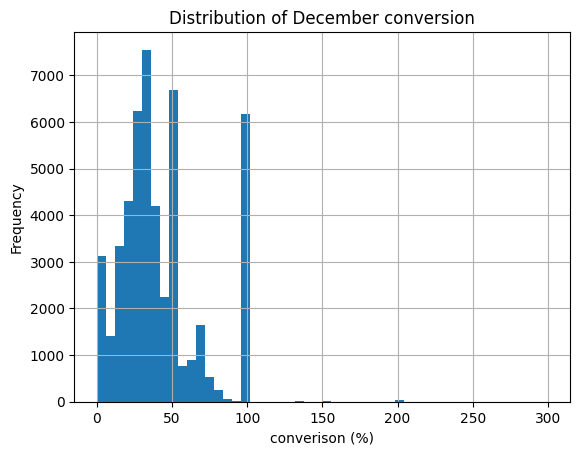

In [ ]:
fig, axis = plt.subplots()

(
    league_table[(np.isinf(league_table['december_conversion']) == False)
    & (np.isnan(league_table['december_conversion']) == False)]
    ['december_conversion']
    .mul(100)
    .hist(bins=50, ax=axis)
)

axis.set(
    title='Distribution of December conversion',
    xlabel='converison (%)',
    ylabel='Frequency'
)

plt.show()

Some fun data issues like >100% conversion aside (we're either missing cart events or they happened in November if the purchase happened on the 1st December just after midnight) it looks like quite a high conversion rate from cart -> purchase, which makes sense.

Let's look at the top performers (data errors included):